In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
prices = sp500['Close']

In [4]:
scaled_prices = []

for i in range(len(prices)):
    x = prices.squeeze().iloc[i]
    y = (x - prices.squeeze().min()) / (prices.squeeze().max() - prices.squeeze().min())
    scaled_prices.append(y)

In [5]:
log_returns = []

for i in range(1,len(prices)):
    x = np.log(prices.squeeze().iloc[i]) - np.log(prices.squeeze().iloc[i-1])
    log_returns.append(x)

log_returns.insert(0,0)

In [6]:
X = pd.DataFrame({
    'Close Prices': prices.squeeze(),
    # 'Log Returns': log_returns,
    # 'Scaled Prices': scaled_prices
})

X['PCT'] = X['Close Prices'].pct_change() * 100
X['PCT-1'] = X['PCT'].shift(1)
X['PCT-2'] = X['PCT'].shift(2)
X['PCT-3'] = X['PCT'].shift(3)
X['PCT-4'] = X['PCT'].shift(4)
X['PCT-5'] = X['PCT'].shift(5)
X['PCT-6'] = X['PCT'].shift(6)
X['PCT-7'] = X['PCT'].shift(7)

X['Volatility'] = X['PCT'].rolling(window=5).std().shift(1)

X = X.dropna()
X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility
Date,,,,,,,,,,
2018-01-12,2786.239990,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864,0.639882,0.367260
2018-01-16,2776.419922,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864,0.359961
2018-01-17,2802.560059,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.470499
2018-01-18,2798.030029,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.566624
2018-01-19,2810.300049,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.577696
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3844.820068,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272,1.189847
2022-12-27,3829.250000,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,1.168318
2022-12-28,3783.219971,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,1.095077


In [7]:
sma_windows = [20, 50, 100, 200]

# Compute multiple SMAs
for window in sma_windows:
    X[f"SMA_{window}"] = X['PCT'].rolling(window=window).mean().shift(1)

X = X.dropna()
X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,,,,
2018-10-29,2641.250000,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,-0.036117,-1.439192,1.829262,-0.447894,-0.127809,-0.038871,-0.015387
2018-10-30,2682.629883,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,-0.036117,1.820990,-0.498897,-0.147574,-0.044716,-0.022041
2018-10-31,2711.739990,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,2.123969,-0.418580,-0.121097,-0.032176,-0.012446
2018-11-01,2740.370117,1.055784,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,1.551602,-0.367881,-0.103531,-0.022393,-0.011727
2018-11-02,2723.060059,-0.631669,1.055784,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,1.399231,-0.274244,-0.081619,-0.013579,-0.005640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3844.820068,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272,1.189847,-0.252571,0.144986,-0.056356,-0.044054
2022-12-27,3829.250000,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,1.168318,-0.221815,0.104791,-0.066126,-0.038974
2022-12-28,3783.219971,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,1.095077,-0.164842,0.144017,-0.069398,-0.034518


In [8]:
Data = pd.DataFrame()

Data['PCT today'] = X['PCT']
Data['PCT today-1'] = X['PCT-1']
Data['PCT today-2'] = X['PCT-2']
Data['PCT today-3'] = X['PCT-3']
Data['PCT today-4'] = X['PCT-4']
Data['PCT today-5'] = X['PCT-5']
Data['PCT today-6'] = X['PCT-6']
Data['PCT today-7'] = X['PCT-7']
Data['Volatility'] = X['Volatility']
Data['SMA_20'] = X['SMA_20']
Data['SMA_50'] = X['SMA_50']
Data['SMA_100'] = X['SMA_100']
Data['SMA_200'] = X['SMA_200']

Data = Data.dropna()

Data

,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,,,
2018-10-29,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,-0.036117,-1.439192,1.829262,-0.447894,-0.127809,-0.038871,-0.015387
2018-10-30,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,-0.036117,1.820990,-0.498897,-0.147574,-0.044716,-0.022041
2018-10-31,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,2.123969,-0.418580,-0.121097,-0.032176,-0.012446
2018-11-01,1.055784,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,1.551602,-0.367881,-0.103531,-0.022393,-0.011727
2018-11-02,-0.631669,1.055784,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,1.399231,-0.274244,-0.081619,-0.013579,-0.005640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272,1.189847,-0.252571,0.144986,-0.056356,-0.044054
2022-12-27,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,1.168318,-0.221815,0.104791,-0.066126,-0.038974
2022-12-28,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,1.095077,-0.164842,0.144017,-0.069398,-0.034518


In [9]:
InputData = Data.drop('PCT today',axis='columns')
InputData

,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,,
2018-10-29,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,-0.036117,-1.439192,1.829262,-0.447894,-0.127809,-0.038871,-0.015387
2018-10-30,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,-0.036117,1.820990,-0.498897,-0.147574,-0.044716,-0.022041
2018-10-31,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,-0.429953,2.123969,-0.418580,-0.121097,-0.032176,-0.012446
2018-11-01,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,-0.551183,1.551602,-0.367881,-0.103531,-0.022393,-0.011727
2018-11-02,1.055784,1.085133,1.566678,-0.655960,-1.732726,1.862504,-3.086443,1.399231,-0.274244,-0.081619,-0.013579,-0.005640
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272,1.189847,-0.252571,0.144986,-0.056356,-0.044054
2022-12-27,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,1.168318,-0.221815,0.104791,-0.066126,-0.038974
2022-12-28,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,1.095077,-0.164842,0.144017,-0.069398,-0.034518


In [10]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

In [24]:
# Single layer perceptron

np.random.seed(42)

ninputs = 12
noutput = 1

weights = np.random.uniform(-1, 1, (ninputs, noutput))
bias = np.random.uniform(-1, 1, (noutput, noutput))

learning_rate = 0.000075
epochs = 101

k = 0.005
T = 253

arr = np.arange(1,101)
SRarr = []

for epoch in range(1,epochs):
    
    allocations = np.zeros(len(InputData))
    net_input = np.zeros(len(InputData))
        
    for i in range(1,len(InputData) + 1):
        current_input = InputData.iloc[i-1]
        
        # Forward pass
        output_input = np.dot(current_input, weights) + bias
        output = tanh(output_input)
        net_input[i-1] = output_input.item()
        allocations[i-1] = output.item()

    # Calculation for Asset Returns and Mu
    asset_returns = allocations * Data['PCT today'].values
    average_daily_return = np.mean(asset_returns)
    average_daily_excess_return = average_daily_return - k
    
    # Calculation of Standard deviation
    squared_deviations = np.square(asset_returns - average_daily_excess_return)
    sigma = np.sqrt(np.mean(squared_deviations))
    
    # Annulaized Sharpe Ratio
    annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
    SRarr.append(annualized_SR)

    # Select highest return pattern
    max_index = np.argmax(asset_returns)
    
    # Update weights per pattern    
    # Backpropagation
    a = np.sqrt(T) / sigma
    b = average_daily_excess_return / sigma
    c = (asset_returns[max_index] - (average_daily_excess_return + k)) / sigma
            
    Ct = a * (1 - (b * c))
                
    beta_output = Ct * Data['PCT today'].iloc[max_index] * tanh_derivative(allocations[max_index]) * net_input[max_index]
            
    weights += learning_rate * beta_output
    bias += learning_rate * beta_output

    if epoch % 50 == 0:
        print(f"Epoch {epoch}")
        print(f"Gradient: {beta_output}, Weight Update: {learning_rate * beta_output}, Ct: {Ct}")
        print(f"Weights: {weights}, Bias: {bias}")
        print(f"Allocations: {allocations}, Net_Input: {net_input}")
        print(f"Asset Returns: {asset_returns}, Average Daily Excess Return: {average_daily_excess_return}")
        print(f"Sigma: {sigma}, Annualized SR: {annualized_SR}")

Epoch 50
Gradient: 5.385882266250499, Weight Update: 0.00040394116996878736, Ct: 13.471165946994372
Weights: [[-0.23411256]
 [ 0.91823582]
 [ 0.48079509]
 [ 0.21412417]
 [-0.67115551]
 [-0.67120376]
 [-0.86702557]
 [ 0.7491595 ]
 [ 0.21903723]
 [ 0.43295236]
 [-0.94202381]
 [ 0.95662691]], Bias: [[0.68169249]]
Allocations: [ 0.99932443  0.88134027  0.99837797 ...  0.99738084  0.83993461
 -0.03650074], Net_Input: [ 3.99638349  1.38173985  3.55820718 ...  3.3183693   1.22095144
 -0.03651697]
Asset Returns: [-0.65551681  1.38077641  1.08337308 ... -1.19891544  1.46663768
  0.0092739 ], Average Daily Excess Return: -0.01946570725919727
Sigma: 1.3052510864103752, Annualized SR: -0.23721185244819853
Epoch 100
Gradient: 9.427462909612645, Weight Update: 0.0007070597182209483, Ct: 13.444792943740477
Weights: [[-0.20753575]
 [ 0.94481263]
 [ 0.5073719 ]
 [ 0.24070098]
 [-0.64457871]
 [-0.64462695]
 [-0.84044876]
 [ 0.77573631]
 [ 0.24561404]
 [ 0.45952917]
 [-0.915447  ]
 [ 0.98320372]], Bias: 

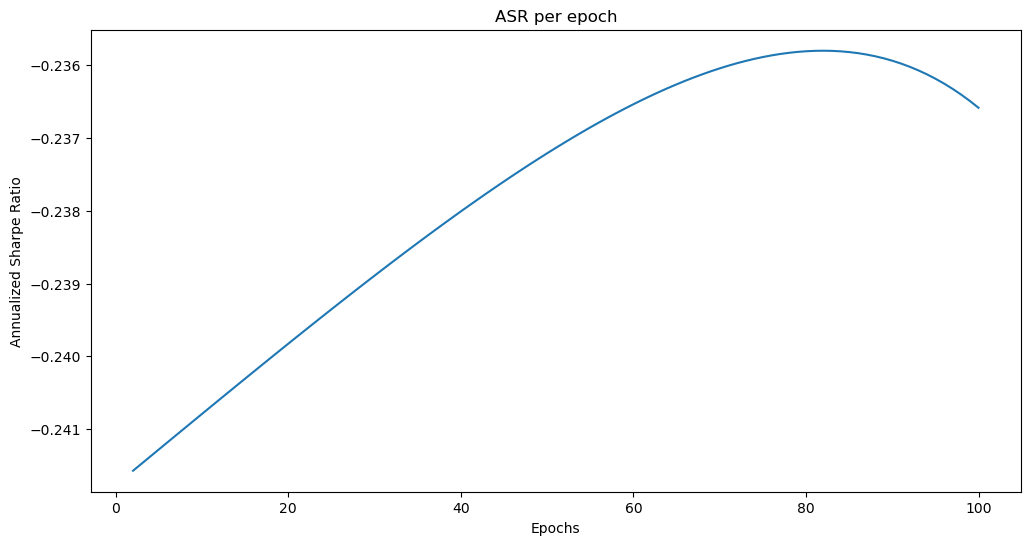

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(arr[1:], SRarr[1:])
plt.xlabel("Epochs")
plt.ylabel("Annualized Sharpe Ratio")
plt.title("ASR per epoch")
plt.show()

In [26]:
test = yf.download('^GSPC', start='2023-01-01', end='2024-12-31', progress=False)
test_prices = test['Close']

In [27]:
test_scaled_prices = []

for i in range(len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = (x - test_prices.squeeze().min()) / (test_prices.squeeze().max() - test_prices.squeeze().min())
    test_scaled_prices.append(y)

In [28]:
test_log_returns = []

for i in range(1,len(test_prices)):
    x = np.log(test_prices.squeeze().iloc[i]) - np.log(test_prices.squeeze().iloc[i-1])
    test_log_returns.append(x)

test_log_returns.insert(0,0)

In [29]:
test_X = pd.DataFrame({
    'Close Prices': test_prices.squeeze(),
    # 'Log Returns': test_log_returns,
    # 'Scaled Prices': test_scaled_prices
})

test_X['PCT'] = test_X['Close Prices'].pct_change() * 100
test_X['PCT-1'] = test_X['PCT'].shift(1)
test_X['PCT-2'] = test_X['PCT'].shift(2)
test_X['PCT-3'] = test_X['PCT'].shift(3)
test_X['PCT-4'] = test_X['PCT'].shift(4)
test_X['PCT-5'] = test_X['PCT'].shift(5)
test_X['PCT-6'] = test_X['PCT'].shift(6)
test_X['PCT-7'] = test_X['PCT'].shift(7)

test_X['Volatility'] = test_X['PCT'].rolling(window=5).std().shift(1)

test_X = test_X.dropna()
test_X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility
Date,,,,,,,,,,
2023-01-13,3999.090088,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553,0.753897,0.917935
2023-01-17,3990.969971,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553,0.504664
2023-01-18,3928.860107,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,0.544200
2023-01-19,3898.850098,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,1.045997
2023-01-20,3972.610107,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,0.819762
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402,1.534285
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,1.585188
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,1.705500


In [30]:
sma_windows = [20, 50, 100, 200]

# Compute multiple SMAs
for window in sma_windows:
    test_X[f"SMA_{window}"] = test_X['PCT'].rolling(window=window).mean().shift(1)

test_X = test_X.dropna()
test_X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,,,,
2023-10-31,4193.799805,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.726579,-0.168557,-1.258528,1.160115,-0.139690,-0.091748,-0.021219,0.026037
2023-11-01,4237.859863,1.050600,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.726579,-0.168557,1.144175,-0.038594,-0.092557,-0.020932,0.027276
2023-11-02,4317.779785,1.885856,1.050600,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.726579,1.035674,-0.026613,-0.065990,-0.011575,0.033545
2023-11-03,4358.339844,0.939373,1.885856,1.050600,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.872614,0.074200,-0.050363,-0.002037,0.050755
2023-11-06,4365.979980,0.175299,0.939373,1.885856,1.050600,0.647496,1.201002,-0.480028,-1.183252,0.461169,0.062094,-0.004659,0.000424,0.059271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402,1.534285,-0.011711,0.054649,0.075479,0.073168
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,1.585188,0.007385,0.057120,0.096460,0.080076
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,1.705500,0.047497,0.063790,0.125884,0.086158


In [31]:
test_Data = pd.DataFrame()

test_Data['Close Prices'] = test_X['Close Prices']
test_Data['PCT today'] = test_X['PCT']
test_Data['PCT today-1'] = test_X['PCT-1']
test_Data['PCT today-2'] = test_X['PCT-2']
test_Data['PCT today-3'] = test_X['PCT-3']
test_Data['PCT today-4'] = test_X['PCT-4']
test_Data['PCT today-5'] = test_X['PCT-5']
test_Data['PCT today-6'] = test_X['PCT-6']
test_Data['PCT today-7'] = test_X['PCT-7']
test_Data['Volatility'] = test_X['Volatility']
test_Data['SMA_20'] = test_X['SMA_20']
test_Data['SMA_50'] = test_X['SMA_50']
test_Data['SMA_100'] = test_X['SMA_100']
test_Data['SMA_200'] = test_X['SMA_200']

test_Data = test_Data.dropna()

test_Data

,Close Prices,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,,,,
2023-10-31,4193.799805,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.726579,-0.168557,-1.258528,1.160115,-0.139690,-0.091748,-0.021219,0.026037
2023-11-01,4237.859863,1.050600,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.726579,-0.168557,1.144175,-0.038594,-0.092557,-0.020932,0.027276
2023-11-02,4317.779785,1.885856,1.050600,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.726579,1.035674,-0.026613,-0.065990,-0.011575,0.033545
2023-11-03,4358.339844,0.939373,1.885856,1.050600,0.647496,1.201002,-0.480028,-1.183252,-1.433963,0.872614,0.074200,-0.050363,-0.002037,0.050755
2023-11-06,4365.979980,0.175299,0.939373,1.885856,1.050600,0.647496,1.201002,-0.480028,-1.183252,0.461169,0.062094,-0.004659,0.000424,0.059271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402,1.534285,-0.011711,0.054649,0.075479,0.073168
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,1.585188,0.007385,0.057120,0.096460,0.080076
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,1.705500,0.047497,0.063790,0.125884,0.086158


In [32]:
input_test_data = test_Data.drop(columns=['Close Prices', 'PCT today'])

Final Portfolio Value: 714121.6547851562
Shares Held: 120
Cash: 5288.86181640625


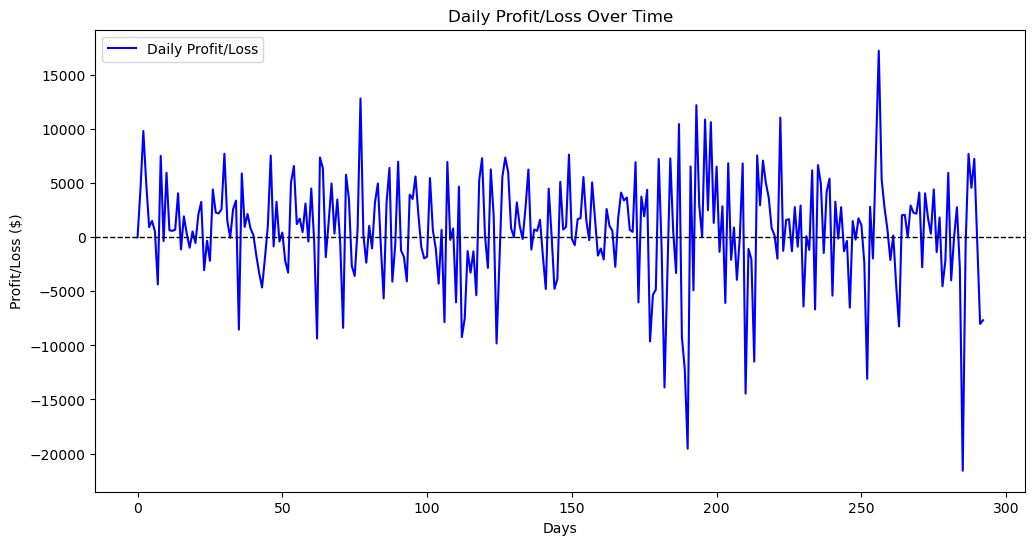

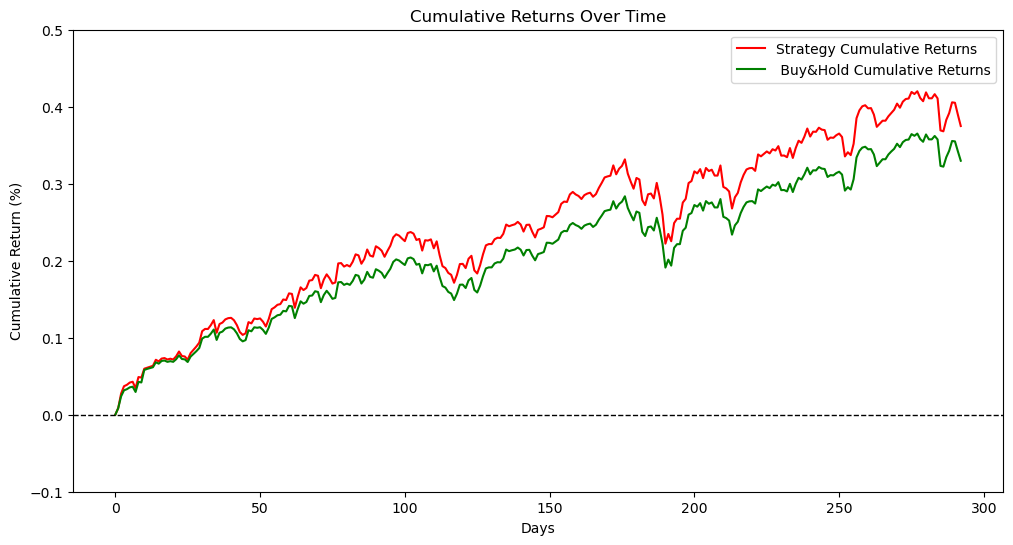

In [33]:
# Initialize tracking variables
portfolio_values = []
profits = []
cumulative_returns = []
allocations = []

# Initialize portfolio
initial_shares = 100
initial_cash = 100000  # Start with no cash
portfolio_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash  # Initial portfolio value
trading_capital = 0.2 * portfolio_value  # 20% of portfolio value for trading
shares_held = initial_shares
cash = initial_cash

cumulative_returns.append(0)
portfolio_values.append(portfolio_value)
profits.append(0)

buy_and_hold_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash
buy_and_hold_cumulative_returns = []
buy_and_hold_cumulative_returns.append(0)

# Trading simulation
for i in range(1,len(input_test_data)):
    current_price = test_Data['Close Prices'].iloc[i]
    current_input = input_test_data.iloc[i]  # Features for the current day
    
    # Forward pass to get allocation
    output_input = np.dot(current_input, weights) + bias
    allocation = np.tanh(output_input).item()  # Model's allocation for the day
    allocations.append(allocation)

    # Recalculate trading capital dynamically
    # trading_capital = 0.2 * portfolio_value

    # Trading logic with risk management
    if allocation > 0:  # Buy signal
        # Calculate the number of shares to buy, ensuring cash does not go negative
        max_shares_to_buy = int(cash / current_price) if cash > 0 else 0
        shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
        cost = shares_to_buy * current_price
        
        # Update portfolio
        shares_held += shares_to_buy
        cash -= cost
    elif allocation < 0:  # Sell signal
        # Calculate the number of shares to sell
        shares_to_sell = int((trading_capital * abs(allocation)) / current_price)
        shares_to_sell = min(shares_to_sell, shares_held)  # Cannot sell more than held
        revenue = shares_to_sell * current_price
        
        # Update portfolio
        shares_held -= shares_to_sell
        cash += revenue

    # Update portfolio value
    new_portfolio_value = shares_held * current_price + cash
    daily_profit = new_portfolio_value - portfolio_values[i-1]  # Profit on this day
    portfolio_values.append(new_portfolio_value)
    profits.append(daily_profit)

    # Calculate cumulative return
    cumulative_returns.append((new_portfolio_value / portfolio_values[0]) - 1)
    buy_and_hold_cumulative_returns.append(((initial_shares * current_price + initial_cash) / buy_and_hold_value) - 1)
    
    # Update portfolio value
    portfolio_value = new_portfolio_value

# Final portfolio value
print(f"Final Portfolio Value: {portfolio_value}")
print(f"Shares Held: {shares_held}")
print(f"Cash: {cash}")

# Plot daily profits
plt.figure(figsize=(12, 6))
plt.plot(profits, label="Daily Profit/Loss", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero-profit line
plt.xlabel("Days")
plt.ylabel("Profit/Loss ($)")
plt.title("Daily Profit/Loss Over Time")
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Strategy Cumulative Returns", color="red")
plt.plot(buy_and_hold_cumulative_returns, label=" Buy&Hold Cumulative Returns", color="green")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
plt.ylim(-0.1,0.5)
plt.xlabel("Days")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.show()

# Plot buy and hold
# plt.figure(figsize=(12, 6))
# plt.plot(buy_and_hold_cumulative_returns, label="Cumulative Returns", color="green")
# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
# plt.ylim(0,0.5)
# plt.xlabel("Days")
# plt.ylabel("Cumulative Return (%)")
# plt.title("Buy and Hold Cumulative Returns Over Time")
# plt.legend()
# plt.show()

In [34]:
# Calculation for Asset Returns and Mu
asset_returns = allocations * test_Data['PCT today'][1:].values
average_daily_return = np.mean(asset_returns)
average_daily_excess_return = average_daily_return - k
    
# Calculation of Standard deviation
squared_deviations = np.square(asset_returns - average_daily_excess_return)
sigma = np.sqrt(np.mean(squared_deviations))
    
# Annulaized Sharpe Ratio
annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
print(f"Annualized Sharpe Ratio: {annualized_SR}")

Annualized Sharpe Ratio: 1.722509478208195


In [35]:
# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate average daily return
average_daily_return = np.mean(daily_returns)

# Calculate standard deviation of daily returns
std_dev_daily_returns = np.std(daily_returns)

# Annualize the average daily return and standard deviation
annualized_return = average_daily_return * 253
annualized_std_dev = std_dev_daily_returns * np.sqrt(253)

# Risk-free rate
risk_free_rate = 0.0002

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 2.3503698058390587


In [36]:
# print(f"Allocations for each day: {allocations}")

In [37]:
sum(profits)

194741.67431640625

In [38]:
sum(allocations)

170.7424778158879

In [25]:
min(allocations)

-0.9950515588359609

In [26]:
max(allocations)

0.9999999151024638

In [27]:
allocations

[0.9929234689775871,
 0.9989677142503486,
 0.9999565191699035,
 0.999807954219457,
 0.9976953810964315,
 0.8286306156917174,
 0.2695132175417313,
 -0.3923054408515914,
 -0.8098615563067012,
 0.957827116008123,
 0.9681821093246372,
 0.9998256068051252,
 0.9903754056846937,
 0.9849406106988069,
 -0.1661353394228799,
 0.8417770639411134,
 0.10327872624181236,
 0.936478318975615,
 0.8233212597173084,
 0.703620653995838,
 0.5493266035518849,
 0.762171298032167,
 0.8959359898152245,
 0.9805758277731915,
 0.9044747553283238,
 0.8017142019384232,
 0.4177256086798877,
 0.9506241678699334,
 0.9726030151779442,
 0.9952983762903679,
 0.969037588722632,
 0.9952603117184402,
 0.9547284734889195,
 0.8898168551863427,
 0.6842816250960069,
 0.9291360798823437,
 -0.2980517530800118,
 0.9552097589043962,
 0.9330414278747361,
 0.9947906245317124,
 0.9396742834391159,
 0.9680663821821979,
 0.1781790390262857,
 0.3039798586670881,
 -0.3273938747549491,
 0.3142073841544229,
 0.9541286539433268,
 0.9996105858

In [28]:
# buy_and_hold_cumulative_returns